In [24]:
import numpy as np
import time

In [25]:
import utilities_cube as utils
import matplotlib.pyplot as plt 

In [26]:
# setting parameters of the experiences
deltat = 1/(60*60*24)   # 1s time step expressed in days.
DELTAT = 30/(60*24)  # time of simulation -->  30 min expressed in days 
D = 6000  # Diffusion coefficient expressed in voxel².day⁻¹   
lenght_per_side = 30    #lenght of the cube  in voxel 
DOM_mass= 100 #  100 mass unit to be distributed in the cubes

### cubes 

In [27]:
dxs = [i for i in range(1,7) if lenght_per_side%i==0 ] #different region length

In [28]:
dxs

[1, 2, 3, 5, 6]

In [29]:
z0_limit = int(max(dxs)) # the DOM_mass will be distributed uniformly depending on the discretization uniformly in voxel

simulation started for dx = 1 voxel 
number of cubes = 27000, number of adjacency = 78300
simulation done! in 2.293473958969116 seconds
simulation started for dx = 2 voxel 
number of cubes = 3375, number of adjacency = 9450
simulation done! in 0.5039410591125488 seconds
simulation started for dx = 3 voxel 
number of cubes = 1000, number of adjacency = 2700
simulation done! in 0.3477363586425781 seconds
simulation started for dx = 5 voxel 
number of cubes = 216, number of adjacency = 540
simulation done! in 0.2924678325653076 seconds
simulation started for dx = 6 voxel 
number of cubes = 125, number of adjacency = 300
simulation done! in 0.2861204147338867 seconds
Irregular cubes : 
number of cubes = 373, number of adjacency = 2208


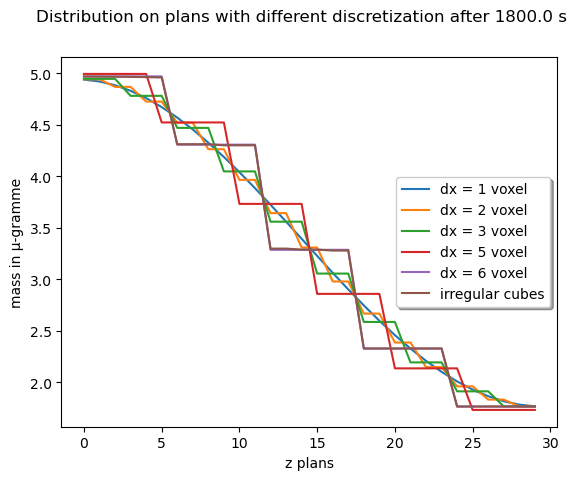

In [30]:
figure, ax = plt.subplots()
for dx in dxs:
    cubes, cubes_adjacency = utils.cubes_and_adjacency(lenght_per_side,dx)
    theta = utils.THETA(cubes,cubes_adjacency)
    filled_cubes = utils.fill_cubs(cubes,z0_limit,DOM_mass)
    print(f"simulation started for dx = {dx} voxel \nnumber of cubes = {cubes.shape[0]}, number of adjacency = {cubes_adjacency.shape[0]}")
    start = time.time()
    simulated_cubes = utils.simulateDiffusion(cubes,theta,filled_cubes,D,deltat,DELTAT)
    print(f"simulation done! in {time.time()-start} seconds")
    simulated_cubes = utils.cubs_to_z_plans(cubes,dx,simulated_cubes)
    x = np.arange(0,simulated_cubes.shape[0],1)
    ax.plot(x,simulated_cubes , label=f'dx = {dx} voxel ')
threeD_image = utils.dividecube(lenght_per_side,z0_limit) # a 30³ v³ image divided to cubes of z0_limit³ v³ 
threeD_image = utils.randomly_slice_3D_image(threeD_image,z0_limit) # we randomly devide the cubes of  z0_limit³ v³ 
irr_cubes,irr_cubes_adjacency,irr_z_limits = utils.graph_from_3D_image(threeD_image)  # we construct a graph by grouping voxels of same region 
print(f"Irregular cubes : \nnumber of cubes = {irr_cubes.shape[0]}, number of adjacency = {irr_cubes_adjacency.shape[0]}")
irr_theta = utils.full_THETA(irr_cubes,irr_cubes_adjacency)
irr_filled_cubes = utils.fill_irregular_cubes(irr_cubes,z0_limit,DOM_mass,irr_z_limits)
irr_simulated_cubes = utils.simulateDiffusion(irr_cubes,irr_theta,irr_filled_cubes,D,deltat,DT)
irr_simulated_cubes = utils.irregular_cubs_to_z_plans(irr_cubes,irr_simulated_cubes,irr_z_limits,threeD_image.shape[0])
x = np.arange(0,irr_simulated_cubes.shape[0],1)
ax.plot(x,irr_simulated_cubes , label=f'irregular cubes')
_ = ax.legend(loc='center right',shadow=True)
ax.set_ylabel('mass in µ-gramme')
ax.set_xlabel('z plans')
figure.patch.set_facecolor('white')
figure.suptitle(f"Distribution on plans with different discretization after {DELTAT*60*60*24} s")
plt.show()

### Irregular cubes

In [ ]:
figure, ax = plt.subplots()
threeD_image = utils.dividecube(lenght_per_side,z0_limit) # a 30³ v³ image divided to cubes of z0_limit³ v³ 
for _ in range(6):
    threeD_image = utils.randomly_slice_3D_image(threeD_image,z0_limit) # we randomly devide the cubes of  z0_limit³ v³ 
    irr_cubes,irr_cubes_adjacency,irr_z_limits = utils.graph_from_3D_image(threeD_image)  # we construct a graph by grouping voxels of same region 
    print(f"Irregular cubes : \nnumber of cubes = {irr_cubes.shape[0]}, number of adjacency = {irr_cubes_adjacency.shape[0]}")
    irr_theta = utils.full_THETA(irr_cubes,irr_cubes_adjacency)
    irr_filled_cubes = utils.fill_irregular_cubes(irr_cubes,z0_limit,DOM_mass,irr_z_limits)
    irr_simulated_cubes = utils.simulateDiffusion(irr_cubes,irr_theta,irr_filled_cubes,D,deltat,DT)
    irr_simulated_cubes = utils.irregular_cubs_to_z_plans(irr_cubes,irr_simulated_cubes,irr_z_limits,threeD_image.shape[0])
    x = np.arange(0,irr_simulated_cubes.shape[0],1)
    ax.plot(x,irr_simulated_cubes , label=f'irregular cubes')
_ = ax.legend(loc='center right',shadow=True)
ax.set_ylabel('mass in µ-gramme')
ax.set_xlabel('z plans')
figure.patch.set_facecolor('white')
figure.suptitle(f"Distribution on plans with different discretization using randomly irregular cubes")
plt.show()

Irregular cubes : 
number of cubes = 373, number of adjacency = 2272


Irregular cubes : 
number of cubes = 373, number of adjacency = 2288


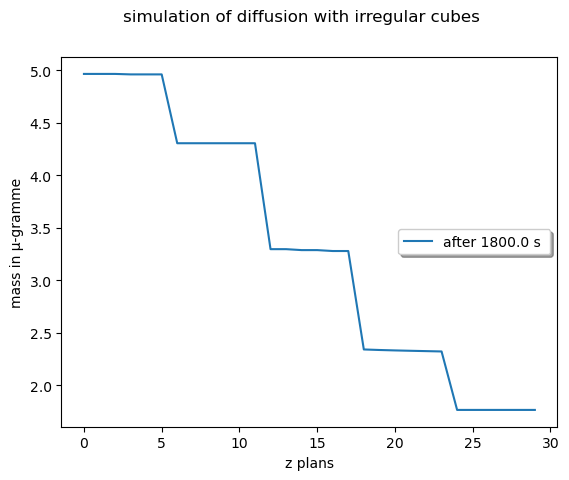

In [23]:
print(f"Irregular cubes : \nnumber of cubes = {cubes.shape[0]}, number of adjacency = {cubes_adjacency.shape[0]}")
DT = DELTAT

figure, ax = plt.subplots()
ax.plot(x,simulated_cubes , label=f'after {DT*60*60*24} s ')
_ = ax.legend(loc='center right',shadow=True)
ax.set_ylabel('mass in µ-gramme')
ax.set_xlabel('z plans')
figure.patch.set_facecolor('white')
figure.suptitle("simulation of diffusion with irregular cubes")
plt.show()